# 3: Data cleanup

dt


- To save new data, do the following:
    - define `merged_data_path` and `raw_data_path`
    - define `get_raw_data` and `get_merged_data`
    - run `tweets_df = get_merged_data(kind = 'tweets', numbers = range( NUMBER ))` with NUMBER the maximum csv number
    - run `tweets_df.to_csv(merged_data_path + 'merged_tweets.csv')`
    - define `fix_user_index`
    - run the loop for `fix_user_index(user_number)`
    - run `users_df = get_merged_data(kind = 'users_idfixed', numbers = range( NUMBER ))`
    - run `users_df.to_csv(merged_data_path + 'merged_users.csv')`
This creates a couple large files `/merged_data/merged_tweets.csv` and `/merged_data/merged_users.csv`. These should be ran on a local machine and `.gitignore`-d.

The data are saved in `/raw_data/` with tweet data in `tweets_NN.csv` and user data for those tweets in `old_users/users_NN.csv`. The user data has an error in saving the user id, so this notebook also corrects that and saves them as `raw_data/users_idfixed_NN.csv`.

The can be merged for user info on `tweets.author_id = users.id` in a later notebook.

- [First results](#First-results)
    - [first tweet results](#first-tweet-results)
    - [first user results](#first-user-results)
    - [merging](#merging)
- [Merging and saving tweet data](#Merging-and-saving-tweet-data)
- [Merging and saving user data](#Merging-and-saving-user-data)
    - [Fixing user data ids](#Fixing-user-data-ids)
    - [Merging and saving user data](#Merging-and-saving-user-data)
- [Saving Wordle text](#Saving-Wordle-text)

In [26]:
import pandas as pd
import numpy as np
import os
import re
import pickle

#######################################################
# change this when importing newly gathered tweet data
#######################################################
max_csv_number = 193

## First results

Starting by pulling in the first results and trying a merge.

In [27]:
raw_data_path = '../raw_data/'
tweets_0_name = 'tweets_0.csv'
users_0_name = 'users_0.csv'

t0 = pd.read_csv(raw_data_path + tweets_0_name, index_col = 'id')

### first tweet results

In [33]:
# look at first csv
t0.head()

,conversation_id,reply_settings,lang,entities,possibly_sensitive,source,public_metrics,text,context_annotations,author_id,created_at,referenced_tweets,in_reply_to_user_id,attachments,geo
id,,,,,,,,,,,,,,,
1521733018293084160,1521733018293084160,everyone,en,"{'urls': [{'start': 54, 'end': 77, 'url': 'htt...",False,Twitter Web App,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle (ES) #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...,"[{'domain': {'id': '30', 'name': 'Entities [En...",1006110502043471872,2022-05-04T06:06:38.000Z,NaN,NaN,NaN,NaN
1521733015738662913,1521733015738662913,everyone,es,"{'urls': [{'start': 58, 'end': 81, 'url': 'htt...",False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",360002014,2022-05-04T06:06:38.000Z,NaN,NaN,NaN,NaN
1521733011414257664,1521733011414257664,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩,"[{'domain': {'id': '30', 'name': 'Entities [En...",828818052892422148,2022-05-04T06:06:37.000Z,NaN,NaN,NaN,NaN
1521733010504445954,1521733010504445954,everyone,en,NaN,False,Twitter for Android,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",Back in the saddle.\n\nWordle 319 3/6\n\n⬜🟩⬜🟨⬜...,"[{'domain': {'id': '30', 'name': 'Entities [En...",862077942,2022-05-04T06:06:36.000Z,NaN,NaN,NaN,NaN
1521733001981444096,1521731925559418880,everyone,en,"{'mentions': [{'start': 0, 'end': 12, 'usernam...",False,Twitter for iPhone,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",@RwellsWells Same. Are we both spotters? Haha ...,"[{'domain': {'id': '30', 'name': 'Entities [En...",53116513,2022-05-04T06:06:34.000Z,"[{'type': 'replied_to', 'id': '152173192555941...",331622540.0,NaN,NaN


In [29]:
t0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 1521733018293084160 to 1521721821825015809
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   conversation_id      1997 non-null   int64  
 1   reply_settings       1997 non-null   object 
 2   lang                 1997 non-null   object 
 3   entities             881 non-null    object 
 4   possibly_sensitive   1997 non-null   bool   
 5   source               1997 non-null   object 
 6   public_metrics       1997 non-null   object 
 7   text                 1997 non-null   object 
 8   context_annotations  1950 non-null   object 
 9   author_id            1997 non-null   int64  
 10  created_at           1997 non-null   object 
 11  referenced_tweets    185 non-null    object 
 12  in_reply_to_user_id  178 non-null    float64
 13  attachments          19 non-null     object 
 14  geo                  45 non-null     object 
dtypes: bo

### first user results

In [34]:
u0 = pd.read_csv(raw_data_path + users_0_name, index_col='id')

In [35]:
u0.head()

,Unnamed: 0,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id
id,,,,,,,,,,,,
1.006111e+18,0,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",NaN,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,NaN,NaN
3.600020e+08,1,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,NaN,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN
8.288181e+17,2,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,NaN,NaN
8.620779e+08,3,John Milton ✊,"{'followers_count': 1465, 'following_count': 2...",https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN
5.311651e+07,4,christopher jones,"{'followers_count': 189, 'following_count': 26...",NaN,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,NaN,NaN


In [36]:
u0.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1982 entries, 1.0061105020434719e+18 to nan
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1982 non-null   int64  
 1   name               1982 non-null   object 
 2   public_metrics     1982 non-null   object 
 3   url                579 non-null    object 
 4   description        1696 non-null   object 
 5   profile_image_url  1982 non-null   object 
 6   location           1449 non-null   object 
 7   protected          1982 non-null   bool   
 8   username           1982 non-null   object 
 9   verified           1982 non-null   bool   
 10  entities           811 non-null    object 
 11  pinned_tweet_id    912 non-null    float64
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 174.2+ KB


There's a ~~big~~ problem with how I saved the users data --- there was a missing line in `repeated_twitter_search` I've since added in:
```python
new_users_df.set_index('id', inplace = True)
```
The first 100 records of every `users_xx.csv` data is an integer, and then becomes the id of the user. After this, the `id` column becomes NaNs. This will be rectified ahead.

### merging

I can expand the JSON columns (`entities_t`, `entities_u`, `public_metrics_t`, `context_annotations`, `public_metrics_u`) later.

In [38]:
t0.columns

Index(['conversation_id', 'reply_settings', 'lang', 'entities',
       'possibly_sensitive', 'source', 'public_metrics', 'text',
       'context_annotations', 'author_id', 'created_at', 'referenced_tweets',
       'in_reply_to_user_id', 'attachments', 'geo'],
      dtype='object')

In [39]:
u0.columns

Index(['Unnamed: 0', 'name', 'public_metrics', 'url', 'description',
       'profile_image_url', 'location', 'protected', 'username', 'verified',
       'entities', 'pinned_tweet_id'],
      dtype='object')

Rather than combining each tweetdf with each userdf, then tacking them on to an aggregated df, let's do this the table / SQL way. Keep the users and tweets separate. They can be joined when necessary. This will save some space. This seems to be the way that Twitter suggests anyway, with the distinction between `tweet.fields` and `user.fields` in the search parameters.

## Merging and saving tweet data

Go through each tweets or users csv in `raw_data`, concatenate them, and save the result.

In [56]:
merged_data_path = '../merged_data/'
raw_data_path = '../raw_data/'

#loads the data in a csv and returns a dataframe with it.
# can get tweet data or user data.

def get_raw_data(kind = 'tweets', number = 0):
    new_df = pd.read_csv(f'{raw_data_path}{kind}_{number}.csv')
    new_df.set_index('id', inplace = True)
    return new_df

# repeatedly call the previous, tacking each onto the end of a new dataframe,
# and return the dataframe


def get_merged_data(kind = 'tweets', numbers = [0,1]):
    #make a new blank df
    new_df = pd.DataFrame()
    #grab each file and tack data onto the end of the dataframe
    for number in numbers:
        this_df = get_raw_data(kind = kind, number = number)
        if kind == 'tweets':
            new_df = pd.concat([new_df, this_df])
        else: #users or users_idfixed
            #explicitly making it 'outer' may be unneccesary. Just making sure
            # there are no duplicates.
            new_df = pd.concat([new_df, this_df], join = 'outer')
    #convert created_at string to datetime before returning
    if 'created_at' in new_df.columns:
        new_df['created_at'] = pd.to_datetime(new_df['created_at'])
    return new_df


# using the above function for both. no need for this.
# def get_merged_tweets(numbers = [0,1]):
#     #make a new blank df
#     new_df = pd.DataFrame()
#     #grab each file and tack data onto the end of the dataframe
#     for number in numbers:
#         this_df = get_raw_data(kind = kind, number = number)
#         if kind == 'tweets':
#             new_df = pd.concat([new_df, this_df])
#         else:
#             this_df.drop(columns = ['Unnamed: 0'], inplace = True)
#             new_df = pd.concat([new_df,this_df], join = 'outer')
#     #convert created_at string to datetime before returning
#     if 'created_at' in new_df.columns:
#         new_df['created_at'] = pd.to_datetime(new_df['created_at'])
#     return new_df

In [57]:
%%time
tweets_df = get_merged_data(kind = 'tweets', numbers = range(max_csv_number + 1))

Wall time: 22.1 s


In [58]:
tweets_df['text'].head()

id
1521733018293084160    Wordle (ES)  #118 5/6\n\n⬜⬜🟨🟩⬜\n⬜⬜🟨🟩⬜\n⬜⬜⬜🟩🟩\n...
1521733015738662913    Wordle Científico #52 5/6\n\n⬜⬜⬜⬜🟨\n🟨⬜⬜⬜🟩\n⬜🟩⬜...
1521733011414257664         Wordle 319 4/6\n\n🟨🟨⬜⬜⬜\n🟨⬜⬜🟩⬜\n🟩🟨⬜🟩🟨\n🟩🟩🟩🟩🟩
1521733010504445954    Back in the saddle.\n\nWordle 319 3/6\n\n⬜🟩⬜🟨⬜...
1521733001981444096    @RwellsWells Same. Are we both spotters? Haha ...
Name: text, dtype: object

In [59]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 386457 entries, 1521733018293084160 to 1521994876677672966
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   conversation_id      386457 non-null  int64              
 1   reply_settings       386457 non-null  object             
 2   lang                 386457 non-null  object             
 3   entities             123247 non-null  object             
 4   possibly_sensitive   386457 non-null  bool               
 5   source               386457 non-null  object             
 6   public_metrics       386457 non-null  object             
 7   text                 386457 non-null  object             
 8   context_annotations  381900 non-null  object             
 9   author_id            386457 non-null  int64              
 10  created_at           386457 non-null  datetime64[ns, UTC]
 11  referenced_tweets    40081 non-nul

<AxesSubplot:xlabel='id'>

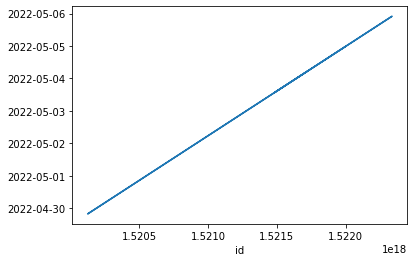

In [60]:
pd.to_datetime(tweets_df['created_at']).plot()

[The linearity is because Tweet IDs are not sequential, but time-based.](https://developer.twitter.com/en/docs/twitter-ids)

> At the very beginning of the platform, these IDs were small enough numbers that they could be generated sequentially. Over time, to accommodate growth, the IDs moved from being 32-bit, to 64-bit. Today, Twitter IDs are unique 64-bit unsigned integers, which are based on time, instead of being sequential. The full ID is composed of a timestamp, a worker number, and a sequence number. Twitter developed an internal service known as “Snowflake” in order to consistently generate these IDs

<AxesSubplot:>

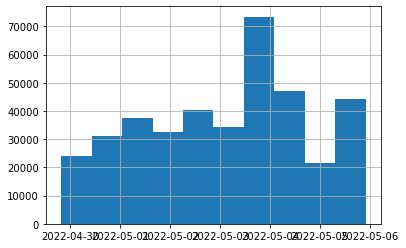

In [61]:
tweets_df['created_at'].hist()

There are maybe twice as many in the late 5-03 -- early 5-04 region as elsewhere. There is an overlap in when data was gathered --- these will have to be discarded, taking care to keep one.

Beautiful wordles! And the size is only about 22 MB (edit -- as of the first few days gathering. still pretty small at ~40MB up to `tweets_161.csv`). What a dream.

In [82]:
len(tweets_df)

335327

Dropping duplicate IDs with the help of [This stack overflow question.](https://stackoverflow.com/questions/13035764/remove-pandas-rows-with-duplicate-indices)

In [83]:
tweets_df = tweets_df[~tweets_df.index.duplicated(keep = 'first')]
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 335327 entries, 1521733018293084160 to 1521994876677672966
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   conversation_id      335327 non-null  int64              
 1   reply_settings       335327 non-null  object             
 2   lang                 335327 non-null  object             
 3   entities             107512 non-null  object             
 4   possibly_sensitive   335327 non-null  bool               
 5   source               335327 non-null  object             
 6   public_metrics       335327 non-null  object             
 7   text                 335327 non-null  object             
 8   context_annotations  331475 non-null  object             
 9   author_id            335327 non-null  int64              
 10  created_at           335327 non-null  datetime64[ns, UTC]
 11  referenced_tweets    35202 non-nul

In [69]:
len(tweets_df)

335327

<AxesSubplot:>

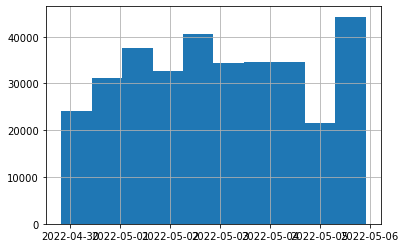

In [70]:
tweets_df['created_at'].hist()

In [73]:
# much better!

In [74]:
%%time
tweets_df.to_csv(merged_data_path + 'merged_tweets.csv')

Wall time: 8.5 s


Now do the same for the users.

## Merging and saving user data


In [75]:
%%time
users_df = get_merged_data(kind = 'users', numbers = range(max_csv_number + 1))

In [76]:
%%time
users_df.to_csv(merged_data_path + 'merged_users.csv')

### Fixing user data ids
the user data ids are messed up. I wrote about that a bit above.

These need to be resaved. The `Unnamed: 0` column is partly indices 0-99, and the index is id, while later they switch. In fact, the ids are all NaNs later on! 

It does seem like it's not reliably always exactly the first 100 with these indices, so I will make sure to check appropriately.

- for each user_xx.csv,
    - pull it in
    - check through all non-NaN indices. for each,
        - copy the index into the Unnamed: 0 column
        - reindex on Unnamed: 0
        - verify that all indices are unique, nothing is lost
        - save an updated copy

In [77]:
# fix user indexes.
# pulls in `users_{number}.csv, fixes the index so that it is the user id, and saves a new copy.

raw_data_path = '../raw_data/'
old_user_data_path = raw_data_path


def fix_user_index(number, extension = '_idfixed'):
    this_user_df = pd.read_csv(old_user_data_path + f'users_{number}.csv', index_col=None)
    this_user_df['id'] = this_user_df.apply(lambda row: row['Unnamed: 0'] if row.isna()['id'] else row['id'], axis = 1)
    this_user_df.set_index('id', inplace = True)
    this_user_df.drop(columns = 'Unnamed: 0', inplace = True)
    #save in the raw data path. do not overwrite the originals.
    this_user_df.to_csv(raw_data_path + f'users{extension}_{number}.csv')
    return None
    

In [78]:
%%time
# fix all of the user data.
first_users_number = 0
last_users_number = max_csv_number
for user_number in range(first_users_number, last_users_number + 1):
    fix_user_index(user_number)
print("done!")

done!
Wall time: 44.2 s


### Merging and saving user data

In [79]:
%%time
users_df = get_merged_data(kind = 'users_idfixed', numbers = range(84+1))

Wall time: 6.47 s


In [80]:
users_df.head()

,name,public_metrics,url,description,profile_image_url,location,protected,username,verified,entities,pinned_tweet_id,withheld
id,,,,,,,,,,,,
1.006111e+18,Jose Antonio,"{'followers_count': 147, 'following_count': 43...",NaN,"Antiguo usuario bloqueado por error, pero he v...",https://pbs.twimg.com/profile_images/144681186...,"Alcalá de Guadaíra, Spain",False,Joseamj_97,False,NaN,NaN,NaN
3.600020e+08,Ana V Garcia,"{'followers_count': 41, 'following_count': 136...",https://t.co/uMfikCmd0I,NaN,https://pbs.twimg.com/profile_images/122215871...,Alcalá de Henares,False,AnaVGarciaG,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
8.288181e+17,Braden Van't Hof,"{'followers_count': 8, 'following_count': 282,...",NaN,LoL Head Coach/Manager/Mid Laner/4x Positional...,https://pbs.twimg.com/profile_images/149527273...,"Grand Rapids, MI",False,CLVRockmelon,False,NaN,NaN,NaN
8.620779e+08,John Milton ✊,"{'followers_count': 1465, 'following_count': 2...",https://t.co/iOfRLxEru5,"It's not criticism, it's just a different way ...",https://pbs.twimg.com/profile_images/150123920...,Spain,False,Geordioca,False,"{'url': {'urls': [{'start': 0, 'end': 23, 'url...",NaN,NaN
5.311651e+07,christopher jones,"{'followers_count': 189, 'following_count': 26...",NaN,I don't like cricket. oh no. i love it!,https://pbs.twimg.com/profile_images/110881711...,sheffield,False,chrisjones792,False,NaN,NaN,NaN


In [81]:
len(users_df)

168362

170 thousand users and tweets in 85 files. A few more tweets than users. (Good! This means some users posted more than once, but not many)

In [24]:
merged_data_path

'../merged_data/'

In [25]:
users_df.to_csv(merged_data_path + 'merged_users.csv')

# Saving Wordle text

I want to grab the wordle grids out of the text, and convert them to arrays in their own dataframe. These should be indexed by the original tweet so they can be merged later.

In [ ]:
# see the text in the tweets
tweets_df['text']

In [214]:
#dictionary to convert squares to numbers.
sq_to_num = {
    '🟩':'2',
    '🟨':'1',
    '⬛':'0',
    '⬜':'0',
}


# turn a row of squares into a list of numbers.
# might actually be completely unused now that I've seen regex in action
def make_row(row_of_squares):
    try:
        new_list = [
            sq_to_num[char]
            for char in row_of_squares
        ]
        return new_list
    except KeyError:
        print("KeyError: The input string must only have those squares!")
        
# create a regex pattern to search for instances of any of these four squares
squares = '[🟩🟨⬜⬛]'
square_regex_pattern = re.compile(squares)

test_wordle_text = "🟨🟨🟩🟨⬜\n\n\n🟩🟨⬜🟩🟩\n🟩🟨⬜🟨⬜\n🟩🟨⬜🟨⬜🟩🟨⬜⬜⬛"

# takes a line of text with the proper sequence of wordle squares and
# returns a translated array of ints
# needs re
# the sequence bit makes it much easier to store in a pandas dataframe.
# it doesn't deal with lists very nicely.
def text_to_wordle(wordle_containing_string, regex_pattern = square_regex_pattern, sequence = False):
    # search the string for anything matching the regex pattern
    search_result = regex_pattern.findall(wordle_containing_string)
    #if it's got a positive multiple of 5 wordle squares in it
    if len(search_result) > 0 and len(search_result)%5 == 0:
        # make the result an np array
        search_result = np.array(search_result)
        # replace every character with its integer conversion
        search_result = [
            sq_to_num[square[0]]
            for square in search_result
        ]
        #reshape the search_result. If sequence == True, spit out a string of integers.
        #otherwise give an nparray.
        if sequence:
            search_result = ''.join(search_result)
        else:
            search_result = np.reshape(search_result, (-1, 5))
        #return
        return search_result
    else:
        return []

In [215]:
text_to_wordle("⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛🟨🟨🟩🟨🟨🟩🟨⬜🟩🟨⬜🟩🟩🟩🟨⬜🟨⬜🟩🟨⬜🟨⬜🟩🟨⬜⬜⬛")

array([['0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0'],
       ['0', '0', '0', '0', '0'],
       ['0', '0', '1', '1', '2'],
       ['1', '1', '2', '1', '0'],
       ['2', '1', '0', '2', '2'],
       ['2', '1', '0', '1', '0'],
       ['2', '1', '0', '1', '0'],
       ['2', '1', '0', '0', '0']], dtype='<U1')

In [216]:
text_to_wordle('asgqae')

[]

In [217]:
text_to_wordle(test_wordle_text)

array([['1', '1', '2', '1', '0'],
       ['2', '1', '0', '2', '2'],
       ['2', '1', '0', '1', '0'],
       ['2', '1', '0', '1', '0'],
       ['2', '1', '0', '0', '0']], dtype='<U1')

In [218]:
text_to_wordle(test_wordle_text, sequence=True)

'1121021022210102101021000'

In [201]:
re.findall('[🟩🟨⬜⬛]', "🟨🟨⬜⬛")

['🟨', '🟨', '⬜', '⬛']

This will be easier than I thought!

In [236]:
%%time
tweets_df['wordle_games'] = tweets_df['text'].apply(lambda text: text_to_wordle(text, sequence = True))

Wall time: 5.67 s


In [237]:
tweets_df['wordle_games']

id
1521733018293084160         0012000120000220202222222
1521733015738662913         0000110002020020202222222
1521733011414257664              11000100202102122222
1521733010504445954                   020102222022222
1521733001981444096                        0020122222
                                    ...              
1520733413246144512    011000202202022020221202222222
1520733412725870592              10000001010000222222
1520733410947485702    120000200002000020012220022222
1520733408607019008              00002100220022222222
1520733408237916161                   002000220022222
Name: wordle_games, Length: 243245, dtype: object

In [240]:
tweets_df['wordle_games'].to_csv(merged_data_path + 'wordle_games.csv')

In [241]:
just_wordles_df = pd.read_csv(merged_data_path + 'wordle_games.csv', index_col='id')
just_wordles_df.head()

,wordle_games
id,
1521733018293084160,0012000120000220202222222
1521733015738662913,0000110002020020202222222
1521733011414257664,11000100202102122222
1521733010504445954,020102222022222
1521733001981444096,0020122222


In [296]:
#remove "NaNs", which are '[]' here. Results with no collection of 5xn squares
len(just_wordles_df) - len(just_wordles_df[just_wordles_df['wordle_games'] != '[]'])

5801

5801 got blanks as a result. Get rid of them.

In [297]:
just_wordles_df = just_wordles_df[just_wordles_df['wordle_games'] != '[]']

In [309]:
# convert the lists into a list of game lists.

def wordle_strings_to_array(wordle_string):
    try: 
        new_array = np.array([char for char in wordle_string])
        new_array.reshape(-1,5)
    except:
        print(f'{wordle_string}')
        return None
    return new_array

In [311]:
wordle_games = [
    np.array([
        int(char)
        for char in game
    ]).reshape(-1,5)
    for game in list(just_wordles_df['wordle_games'])
]

In [314]:
wordle_games_file_path = merged_data_path + 'wordle_games.pkl'
with open(wordle_games_file_path, 'wb') as save_it_file:
    pickle.dump(wordle_games, save_it_file)
    
with open(wordle_games_file_path, 'rb') as read_it:
    hi = pickle.load(read_it)
hi

[array([[0, 0, 1, 2, 0],
        [0, 0, 1, 2, 0],
        [0, 0, 0, 2, 2],
        [0, 2, 0, 2, 2],
        [2, 2, 2, 2, 2]]),
 array([[0, 0, 0, 0, 1],
        [1, 0, 0, 0, 2],
        [0, 2, 0, 0, 2],
        [0, 2, 0, 2, 2],
        [2, 2, 2, 2, 2]]),
 array([[1, 1, 0, 0, 0],
        [1, 0, 0, 2, 0],
        [2, 1, 0, 2, 1],
        [2, 2, 2, 2, 2]]),
 array([[0, 2, 0, 1, 0],
        [2, 2, 2, 2, 0],
        [2, 2, 2, 2, 2]]),
 array([[0, 0, 2, 0, 1],
        [2, 2, 2, 2, 2]]),
 array([[1, 1, 0, 2, 0],
        [0, 0, 2, 2, 1],
        [2, 2, 2, 2, 2]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 2],
        [0, 0, 1, 1, 2],
        [1, 2, 0, 0, 2],
        [2, 2, 2, 2, 2]]),
 array([[0, 1, 0, 0, 0],
        [0, 0, 1, 0, 1],
        [0, 0, 1, 0, 1],
        [2, 2, 2, 2, 2]]),
 array([[0, 2, 0, 1, 0],
        [0, 2, 2, 2, 2],
        [0, 2, 2, 2, 2],
        [0, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]]),
 array([[0, 2, 2, 1, 0],
        [0, 0, 0, 2, 0],
        [2, 2, 2, 2, 0],
       